In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as KNN
import matplotlib.pyplot  as plt


In [4]:
df = pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
'''
---This dataset is best known for pattern recognition
---Predicted attribute: class of iris plant.
--- There are 4 attributes as follows:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica'''

In [5]:
#Use the IRIS data set to build a logistic regression model (using sklearn) and predict the class label
#‘Species’. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 
df = df.drop(columns='Id', axis=1) 

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])


In [8]:
X = df.drop(columns='Species', axis=1) 
y = df.Species.values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(y_train.shape)

(105,)


In [9]:
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
x_train = data_scaler_minmax.fit_transform(x_train)
x_test = data_scaler_minmax.fit_transform(x_test)

In [10]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
logisticRegr.predict(x_test[0].reshape(1,-1))
predictions = logisticRegr.predict(x_test)
print(predictions.shape)


(45,)


In [11]:
#Analysis and visualize the performance of the classifier using metrics, confusion matrix .
score = logisticRegr.score(x_test, y_test)
print(score)

0.9111111111111111


In [12]:
y_pred=logisticRegr.predict(x_test)
confusion_mat=confusion_matrix(y_test,y_pred)
print(confusion_mat)

[[14  0  0]
 [ 0 15  3]
 [ 0  1 12]]


In [13]:
Accuracy=(confusion_mat[0][0]+confusion_mat[1][1]+confusion_mat[2][2])/np.sum(confusion_mat[:,:])
print(Accuracy)

0.9111111111111111


For k: 2 Test Accuracy: 0.9555555555555556
For k: 3 Test Accuracy: 0.9555555555555556
For k: 4 Test Accuracy: 0.9555555555555556
For k: 5 Test Accuracy: 0.9333333333333333
For k: 6 Test Accuracy: 0.9333333333333333
For k: 7 Test Accuracy: 0.9333333333333333
For k: 8 Test Accuracy: 0.9333333333333333
For k: 9 Test Accuracy: 0.9333333333333333
For k: 10 Test Accuracy: 0.9333333333333333
For k: 11 Test Accuracy: 0.9333333333333333
For k: 12 Test Accuracy: 0.9333333333333333
For k: 13 Test Accuracy: 0.9333333333333333
For k: 14 Test Accuracy: 0.9333333333333333
For k: 15 Test Accuracy: 0.9333333333333333
For k: 16 Test Accuracy: 0.9333333333333333
For k: 17 Test Accuracy: 0.9555555555555556
For k: 18 Test Accuracy: 0.9555555555555556
For k: 19 Test Accuracy: 0.9555555555555556
For k: 20 Test Accuracy: 0.9555555555555556


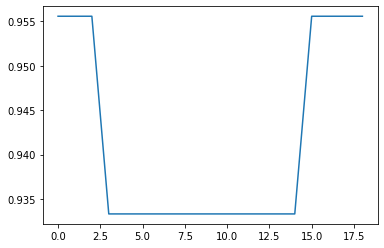

As KNN classifiers provides 0.95 accuracy compared to 0.91 of logistic regression this shows that KNN classifier is a better algorithm for this dataset


In [14]:
'''Use the IRIS data and KNeighborsClassifier (using sklearn) and predict the class label ‘Species’ for
k value between 2 and 20. Divide the dataset into training and test set (70,30) using train_test_split
method in sklearn'''

'''Comment on the classifier (Logistic Regression or KNeighborsClassifier ) that has a better
performance for the IRIS dataset.'''


K=[]
test_acc=[]

for k in range(2,21):
    model=KNN(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    cf_mat=confusion_matrix(y_test,y_pred)
    test_accuracy=np.trace(cf_mat)/np.sum(cf_mat)
    print("For k:",k,"Test Accuracy:",test_accuracy)
    K.append(k)
    test_acc.append(test_accuracy)
plt.plot(test_acc)
plt.show()
print("As KNN classifiers provides 0.95 accuracy compared to 0.91 of logistic regression this shows that KNN classifier is a better algorithm for this dataset")

In [ ]:
'''Identify the best k ( for k between 2 and 20) for the model built.'''
k=3